# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 5: Exploração de outras bases de dados** <br/>

In [6]:
import pandas
import matplotlib.pyplot as plt

enade2014=pandas.read_csv("datasets/MICRODADOS_ENADE_2014.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


enade2014.shape

(481720, 154)

In [7]:
enade2014.columns[0:]

Index([u'NU_ANO', u'CO_IES', u'CO_CATEGAD', u'CO_ORGACAD', u'CO_GRUPO',
       u'CO_CURSO', u'CO_MODALIDADE', u'CO_MUNIC_CURSO', u'CO_UF_CURSO',
       u'CO_REGIAO_CURSO',
       ...
       u'QE_I72', u'QE_I73', u'QE_I74', u'QE_I75', u'QE_I76', u'QE_I77',
       u'QE_I78', u'QE_I79', u'QE_I80', u'QE_I81'],
      dtype='object', length=154)

In [8]:
'''
nota geral: 0-98 
questão08: Qual a renda total de sua família, incluindo seus rendimentos?
A = Até 1,5 salário mínimo (até R$ 1.405,50).
B = De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00).
C = De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50).
D = De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00).
E = De 6 a 10 salários mínimos (R$ 5. 622,01 a R$ 9.370,00).
F = De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00).
G = Acima de 30 salários mínimos (mais de R$ 28.110,00).

i05 escolaridade da mae
A = Nenhuma.
B = Ensino fundamental: 1º ao 5º ano (1ª a 4ª série).
C = Ensino fundamental: 6º ao 9º ano (5ª a 8ª série).
D = Ensino médio.
E = Ensino Superior - Graduação.
F = Pós-graduação.

'''

tabela = pandas.DataFrame(enade2014, columns=['NT_GER', 'CO_GRUPO', 'QE_I08', 'CO_IES', 'QE_I05', 'QE_I17', 'CO_REGIAO_CURSO'])

In [9]:
##limpeza dos dados

#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')

#observe os NaN (not a number)

In [10]:
'''No arquivo 'Dicionário de variáveis dos Microdados do Enade_Edição 2017' descreve que:
o codigo 222 no campo TP_PR_GER significa ausente 
556 e 888 são participações desconsideradas.
Portanto, algumas notas podem ser desconsideradas dependendo do seu objetivo, 
e aqui, será de calcular a média daqueles que fizeram a prova.
'''
tabela=tabela.loc[(tabela['NT_GER'].notnull())]
#print(tabela['NT_GER'])
#converte de str para float
tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])
ccomp = tabela[tabela['CO_GRUPO']==4004]



In [11]:
#Calcula a média de um curso especifico
#Código da área de enquadramento do curso no Enade == ciencia da computacao

#ccomp = tabela[tabela['CO_CURSO']==]

In [12]:
import matplotlib.pyplot as plt


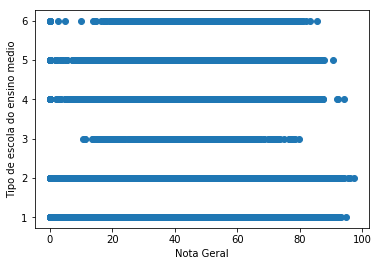

In [13]:
# Verificar o impacto do ensino médio no ensino superior
"""
A = Todo em escola pública.
B = Todo em escola privada (particular).
C = Todo no exterior.
D = A maior parte em escola pública.
E = A maior parte em escola privada (particular).
F = Parte no Brasil e parte no exterior.
"""
#escola = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
#print(escola)
tabela['QE_I17'] = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
tabela=tabela.loc[(tabela['QE_I17'].notnull())]
plt.scatter( tabela.NT_GER, tabela.QE_I17 )
plt.xlabel('Nota Geral')
plt.ylabel('Tipo de escola do ensino medio')
plt.show()

In [14]:
tabela['NT_GER'].groupby(tabela['QE_I17']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I17,,,,,,,,
1.0,276130.0,43.308337,14.395568,0.0,32.90,42.8,53.3,94.7
2.0,83310.0,48.193854,14.915903,0.0,38.10,48.5,58.8,97.4
3.0,399.0,43.664411,15.573450,10.7,32.45,43.5,55.2,79.9
4.0,20512.0,42.812817,14.244996,0.0,32.60,42.3,52.7,94.1
5.0,14298.0,44.542307,14.652270,0.0,34.20,44.3,54.7,90.6
6.0,766.0,48.965144,15.202987,0.0,39.30,49.7,59.6,85.4


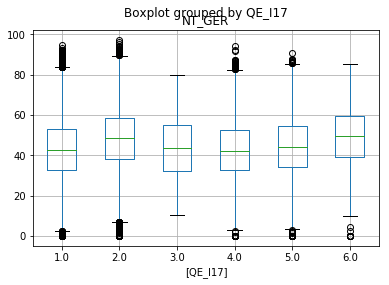

In [15]:
qe09 = pandas.DataFrame(tabela, columns=['NT_GER', 'QE_I17'])
qe09.boxplot(by='QE_I17')

/usr/lib/python2.7/dist-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9969707727432251, 0.0)
(0.9954896569252014, 2.5607328137071707e-41)


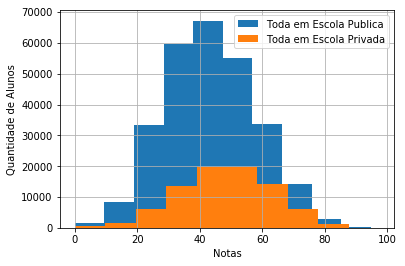

In [16]:
import scipy.stats as stats

print(stats.shapiro(qe09.NT_GER.loc[qe09.QE_I17 == 1]))

print(stats.shapiro(qe09.NT_GER.loc[qe09.QE_I17 == 2]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qe09.NT_GER.loc[qe09.QE_I17 ==1].hist(label="Toda em Escola Publica")
qe09.NT_GER.loc[qe09.QE_I17 ==2].hist(label="Toda em Escola Privada")
plt.xlabel("Notas")
plt.ylabel("Quantidade de Alunos")
plt.legend()

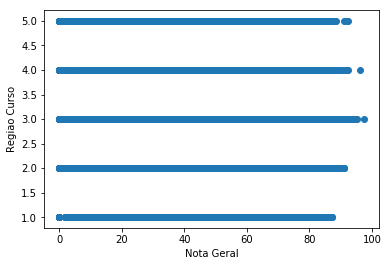

,count,mean,std,min,25%,50%,75%,max
CO_REGIAO_CURSO,,,,,,,,
1,28018.0,40.300589,13.885618,0.0,30.4,39.5,49.7,87.3
2,78284.0,42.718649,14.521294,0.0,32.3,42.3,52.9,91.1
3,176191.0,45.444245,14.756792,0.0,35.0,45.1,55.8,97.4
4,79377.0,45.515373,14.532471,0.0,35.0,45.4,55.9,96.1
5,33545.0,43.245303,14.228082,0.0,33.0,42.8,53.3,92.2


In [20]:
# Verificar os resultados a partir da região do país
"""
1 Norte
2 Nordeste
3 Sudeste
4 Sul
5 Centro-Oeste
"""
#escola = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
#print(escola)
#tabela['CO_REGIAO_CURSO'] = tabela['CO_REGIAO_CURSO'].map({1 : 'N', 2 : 'NE', 3 : 'SE', 4 : 'S', 5 : 'CO'})
tabela=tabela.loc[(tabela['CO_REGIAO_CURSO'].notnull())]
plt.scatter( tabela.NT_GER, tabela.CO_REGIAO_CURSO )
plt.xlabel('Nota Geral')
plt.ylabel('Regiao Curso')
plt.show()
#nota geral agrupada pela questão 05
tabela['NT_GER'].groupby(tabela['CO_REGIAO_CURSO']).describe()



In [ ]:
#nota geral agrupada pela questão 05
#tabela['CO_REGIAO_CURSO'] = tabela['CO_REGIAO_CURSO'].map({1 : 'N', 2 : 'NE', 3 : 'SE', 4 : 'S', 5 : 'CO'})
tabela['NT_GER'].groupby(tabela['CO_REGIAO_CURSO']).describe()

In [ ]:
#print(stats.shapiro(qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO == 'N']))

#print(stats.shapiro(qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO == 'S']))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
#qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO =='S'].hist(label="Sul")
#qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO =='N'].hist(label="Norte")
#plt.xlabel("Notas")
#plt.ylabel("Quantidade de Alunos")
#plt.legend()

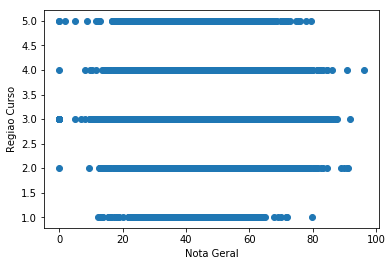

,count,mean,std,min,25%,50%,75%,max
CO_REGIAO_CURSO,,,,,,,,
1,380.0,40.620789,12.193011,12.2,31.575,40.95,49.000,79.8
2,1540.0,45.080974,14.251808,0.0,34.900,44.50,54.300,91.0
3,4203.0,43.815251,13.602053,0.0,34.200,42.90,52.800,91.9
4,1647.0,46.764542,13.386456,0.0,37.000,46.10,55.800,96.1
5,506.0,42.756719,14.076424,0.0,33.000,41.90,52.175,79.3


In [21]:
"""
1 Norte
2 Nordeste
3 Sudeste
4 Sul
5 Centro-Oeste
"""

ccomp=ccomp.loc[(ccomp['CO_REGIAO_CURSO'].notnull())]
plt.scatter( ccomp.NT_GER, ccomp.CO_REGIAO_CURSO )
plt.xlabel('Nota Geral')
plt.ylabel('Regiao Curso')
plt.show()
#nota geral agrupada pela questão 05
ccomp['NT_GER'].groupby(ccomp['CO_REGIAO_CURSO']).describe()

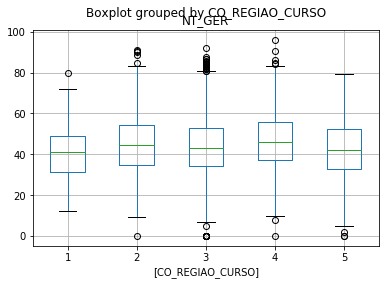

In [22]:
qe05 = pandas.DataFrame(ccomp, columns=['NT_GER', 'CO_REGIAO_CURSO'])
qe05.boxplot(by='CO_REGIAO_CURSO')

(0.9936023354530334, 0.10847082734107971)
(0.9969756007194519, 0.0027237555477768183)


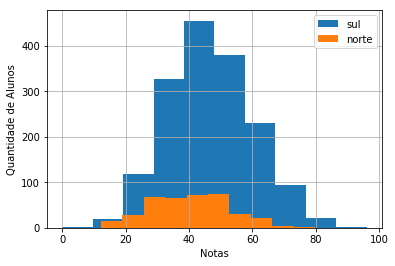

In [25]:
print(stats.shapiro(qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO ==1]))

print(stats.shapiro(qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO == 4]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO==4].hist(label="sul")
qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO==1].hist(label="norte")
plt.xlabel("Notas")
plt.ylabel("Quantidade de Alunos")
plt.legend()